# Problem rubnih vrijednosti



## Klasifikacija

Neka je 

$$ 
a\cdot u_{xx}+b\cdot u_{xt}+c\cdot u_{tt}+d\cdot u_x+e\cdot u_t + f\cdot u + g = 0
$$

i neka je

$$
D=b^2-4ac.
$$

Vrijedi sljedeća klasifikacija:

|D | D=0  | D<0 | D>0 |  
|:---:|:---:|:--:|:---:|
|Vrsta| parabolička | eliptička | hiperbolička |
|Problem| difuzija  | ravnoteža | valovi   |
|Domena / Metoda | omeđena / SLP | omeđena / SLP | |
|                | neomeđena / integr. trans. | neomeđena / integr. trans. | |

Za neomeđeni interval $(0,\infty)$ koristi se Laplace-ova transformacija, a za interval $(\infty,\infty)$ koristi se Fourier-ova transformacija.

## Jednadžba difuzije

Zadan je problem 

\begin{align*}
& u_t-u_{xx}=0  \\
& u(x,0)=|x|, \quad -2<x<2 \\
& u_x(-2,t)=0, \quad u_x(2,t)=0, \quad t>0 
\end{align*}

Pretpostavimo separaciju varijabli (rješenje je jedinstveno pa je svaka pretpostavka korektna ako daje rješenje):

$$
u(x,t)=X(x)T(t).
$$ 

Uvrštavanje u jednadžbu daje

$$
XT'=X''T
$$

odnosno (stavljamo $-\lambda$ po dogovoru)

$$
\frac{T'}{T}=\frac{X''}{X}=-\lambda,
$$

za neki $\lambda \in\mathbb{R}$.
Dakle,

$$
\frac{T'}{T}=\frac{X''}{X}=-\lambda,
$$

za neki $\lambda \in\mathbb{R}$.

Dobili smo SLP i populacijsku jednadžbu:

1. SLP: $ X''+\lambda X=0$ uz uvjete $X'(-2)=0$ i $X'(2)=0$
2. Populacijska jednadžba: $T'+\lambda T=0$

Za $\lambda \geq 0$ SLP ima svojstvene vrijednosti (izračunajte!, vidi napomenu!)

$$
\lambda_n = \frac{n^2\pi^2}{4}, \quad n\in \mathbb{N}\cup \{0\}.
$$

i pripadne svojstvene funkcije 

$$ 
X_n(x)= A_n \cos \big(\frac{n\pi}{2}x\big ).
$$

Za svaki $\lambda_n$ rješenje populacijske jednadžbe glasi 

$$
T_n(t)=B_n e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

što zajedno daje 

$$
u_n(x,t)= C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}.
$$

Svaka funkcija $u_n$ zadovoljava jednadžbu i rubne uvjete. 

Prema _principu superpozicije_ i funkcija 

$$
u(x,t)=\sum_{n=0}^\infty u_n(x,t)= \sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) e^{\displaystyle-\frac{n^2\pi^2}{4} t}
$$

također zadovoljava jednadžbu i rubne uvjete. Treba još odabrati koeficijente $C_n$ tako da se zadovolji i početni uvijet - radi se o razvoju u _(generalizirani) Fourierov red_:

\begin{align*}
& u(x,0)=\sum_{n=0}^\infty C_n \cos \big(\frac{n\pi}{2}x\big ) \\
& C_n=  \displaystyle \frac{ \big(|x|, \cos \big(\frac{n\pi}{2}x\big ) \big)}
{\big (\cos \big(\frac{n\pi}{2}x\big ), \cos \big(\frac{n\pi}{2}x\big ) \big)} \tag{*}
\end{align*}

__Napomena:__ Kod traženja svojstvenih vrijednosti za slučaj $\lambda>0$, zbog parnosti početnog uvjeta možemo odmah staviti da je koeficijent uz $\sin(\sqrt{\lambda}x)$ jednak nuli.

Probajmo simboličko računanje - treba nam paket `PyPlot.jl` za crtanje i paket `SymPy.jl` za simboličko računanje:

In [1]:
using PyPlot
using SymPy

In [2]:
# Definirajmo simbole
n=symbols("n",integer=true, nonnegative=true)
x=Sym("x")

x

In [3]:
# Definirajmo skalarni produkt
import Base.⋅
⋅(f,g,a,b)=integrate(f*g,(x,a,b))

dot (generic function with 12 methods)

In [4]:
g=abs(x)

|x|

In [5]:
f(n)=cos(n*PI*x/2)

f (generic function with 1 method)

In [6]:
# Na primjer
f(2)

cos(pi*x)

In [7]:
f(0)

1

Izračunajmo koeficijente $C_n$:

In [8]:
C(n)=⋅(g,f(n),-2,2)/⋅(f(n),f(n),-2,2)

C (generic function with 1 method)

In [9]:
C(0)

1

In [10]:
C(1)

-8 
---
  2
pi 

In [11]:
C(2)

0

In [12]:
C(3)

 -8  
-----
    2
9*pi 

In [13]:
C(5)

 -8   
------
     2
25*pi 

Vidimo da je 

\begin{align}
& C_0=1, \\
& C_{2k}=0, \\
& C_{2k-1}=\displaystyle\frac{-8}{(2k-1)^2\pi^2},
\end{align}

odnosno

$$
u(x,t)=1 - \sum_{k=1}^\infty \frac{8}{(2k-1)^2\pi^2}
\cos \bigg(\frac{(2k-1)\pi}{2}x\bigg ) e^{\displaystyle-\frac{(2k-1)^2\pi^2}{4} t}.
$$

Definirajmo sumu prvih $n$ članova reda:

In [14]:
k=symbols("k", integer=true)
t=symbols("t", real=true, nonnegative=true)

t

In [15]:
u(n)=C(n)*f(n)*exp(-(n^2*PI^2*t/4))

u (generic function with 1 method)

In [16]:
# Na primjer
u(0)

1

In [17]:
u(3)

         2                
    -9*pi *t              
    ---------             
        4        /3*pi*x\ 
-8*e         *cos|------| 
                 \  2   / 
--------------------------
              2           
          9*pi            

In [18]:
# u(3) u nekoj točki (x,t)
u(3)(0.5,0.5)

             2              
    -1.125*pi               
-8*e          *cos(0.75*pi) 
----------------------------
               2            
           9*pi             

In [19]:
# Numerička vrijednost
N(u(3)(0.5,0.5))

9.59243054056247e-7

In [20]:
# Suma prvih n članova reda
U(n)=summation(u(k),(k,0,n))

U (generic function with 1 method)

In [21]:
U(5)

          2                        2                           2              
       -pi *t                 -9*pi *t                   -25*pi *t            
       -------                ---------                  ----------           
          4       /pi*x\          4        /3*pi*x\          4         /5*pi*x
    8*e       *cos|----|   8*e         *cos|------|   8*e          *cos|------
                  \ 2  /                   \  2   /                    \  2   
1 - -------------------- - ------------------------ - ------------------------
              2                         2                            2        
            pi                      9*pi                        25*pi         

 
 
 
\
|
/
-
 
 

In [22]:
# Numerička vrijednost
N(U(5)(0.5,0.5))

0.8330895966582438

In [23]:
# Za t=0 ovo mora konvergirati u |x|
@time N(U(11)(0.5,0.0))

  2.427475 seconds (1.47 k allocations: 51.576 KiB)


0.499415238140432

__Napomena:__ Radi se o simboličkom računanju pa ne treba pretjerivati s $n$.

### Crtanje

In [24]:
m=8
X=linspace(-2,2,m)
T=linspace(0,5,m)

0.0:0.7142857142857143:5.0

In [25]:
# Ovo je sporo jer se radi o simboličkoj funkciji 
# (8*8*2.5=160 sekunda)
z = zeros(m,m)
for i in 1:m
    for j in 1:m
        z[i,j] = N(U(9)(X[i],T[j]))
    end
end

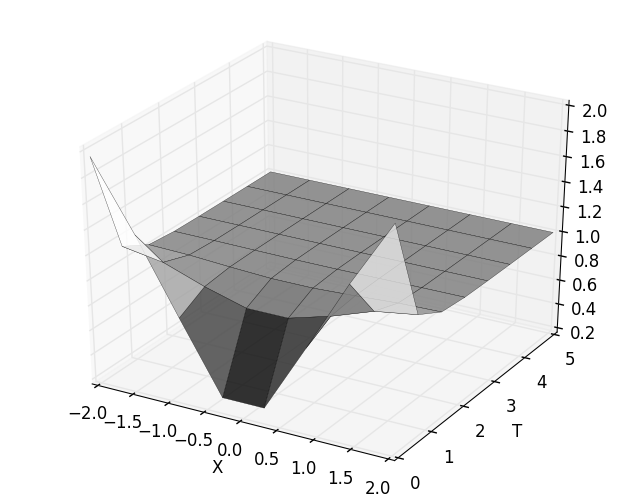

PyObject <matplotlib.text.Text object at 0x7f426b8ca190>

In [26]:
plot_surface(X,T,z',rstride=1,edgecolors="k", cstride=1, 
    cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
xlabel("X")
ylabel("T")

### Numeričko računanje i crtanje

Pogledajmo interaktivno konvergenciju - treba nam paket `Interact.jl`:

In [27]:
using Interact

INFO: Interact.jl: using new nbwidgetsextension protocol


In [28]:
X=linspace(-2,2)
T=linspace(0,5)
XT=collect(Iterators.product(X,T))

50×50 Array{Tuple{Float64,Float64},2}:
 (-2.0, 0.0)      (-2.0, 0.102041)      …  (-2.0, 5.0)    
 (-1.91837, 0.0)  (-1.91837, 0.102041)     (-1.91837, 5.0)
 (-1.83673, 0.0)  (-1.83673, 0.102041)     (-1.83673, 5.0)
 (-1.7551, 0.0)   (-1.7551, 0.102041)      (-1.7551, 5.0) 
 (-1.67347, 0.0)  (-1.67347, 0.102041)     (-1.67347, 5.0)
 (-1.59184, 0.0)  (-1.59184, 0.102041)  …  (-1.59184, 5.0)
 (-1.5102, 0.0)   (-1.5102, 0.102041)      (-1.5102, 5.0) 
 (-1.42857, 0.0)  (-1.42857, 0.102041)     (-1.42857, 5.0)
 (-1.34694, 0.0)  (-1.34694, 0.102041)     (-1.34694, 5.0)
 (-1.26531, 0.0)  (-1.26531, 0.102041)     (-1.26531, 5.0)
 (-1.18367, 0.0)  (-1.18367, 0.102041)  …  (-1.18367, 5.0)
 (-1.10204, 0.0)  (-1.10204, 0.102041)     (-1.10204, 5.0)
 (-1.02041, 0.0)  (-1.02041, 0.102041)     (-1.02041, 5.0)
 ⋮                                      ⋱                 
 (1.10204, 0.0)   (1.10204, 0.102041)      (1.10204, 5.0) 
 (1.18367, 0.0)   (1.18367, 0.102041)      (1.18367, 5.0) 
 (1.26531, 0.0)  

Interact.Slider{Int64}(1: "input" = 1 Int64 , "", 1, 1:10, "horizontal", true, "d", true)

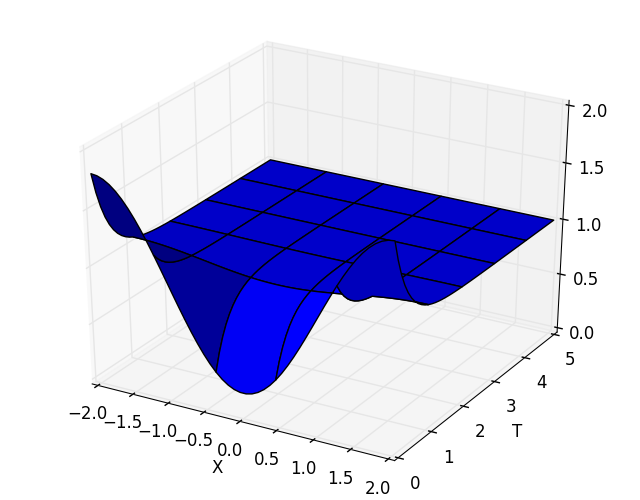

In [29]:
g=figure()
@manipulate for l in slider(1:10, value=1) ; withfig(g) do
        h(xt)=1-8*sum([cos.((2*k-1)*pi*xt[1]/2).*exp.(-(2*k-1)^2*pi^2*xt[2]/4)/((2*k-1)^2*π^2) 
                for k=1:l])
        surf(X,T,map(h,XT)')
        xlabel("X")
        ylabel("T")
    end
end

## Primjer 1

\begin{align*}
& u_t-u_{xx}=-u \\
& u(x,0)=f(x)=\begin{cases}0, \quad -1<x<0 \\ x,\quad 0<x<1 \end{cases} \\
& u(-1,t)=0,\quad u(1,t)=0 
\end{align*}

Za detalje o simboličkom računanju pogledajte
[SymPy Tutorial](https://github.com/jverzani/SymPy.jl/blob/master/examples/tutorial.md).

Uvrštavanjem

$$
u(x,t)=X(x)T(t)
$$

jednadžba prelazi u jednadžbu

$$
T'X-TX''=-TX,
$$

što daje dvije jednadžbe:

$$
\frac{X''}{X}=\frac{T'+T}{T}=-\lambda.
$$

Jednadžba po $T$ je populacijska jednadžba koja glasi

$$
T'=-(\lambda+1)T
$$

i čije rješenje je

$$
T=Ce^{-(\lambda+1)t}.
$$

Riješimo SLP po $X$:

$$
X''=-\lambda X, \quad X(-1)=0, \quad X(1)=0.
$$

In [30]:
F = SymFunction("F")

F

In [31]:
l=symbols("l",real=true,positive=true)
diffeq = Eq(diff(F(x), x, x) +l*F(x), 0)

           2          
          d           
l*F(x) + ---(F(x)) = 0
           2          
         dx           

In [32]:
ex = dsolve(diffeq)

             /  ___  \         /  ___  \
F(x) = C1*sin\\/ l *x/ + C2*cos\\/ l *x/

In [33]:
ex1 = rhs(ex)

      /  ___  \         /  ___  \
C1*sin\\/ l *x/ + C2*cos\\/ l *x/

Uvrstimo rubne uvjete:

In [34]:
ex1a=subs(ex1,x,-1)

        /  ___\         /  ___\
- C1*sin\\/ l / + C2*cos\\/ l /

In [35]:
ex1b=subs(ex1,x,1)

      /  ___\         /  ___\
C1*sin\\/ l / + C2*cos\\/ l /

In [36]:
solve(cos(sqrt(l)),l)

2-element Array{SymPy.Sym,1}:
   pi^2/4
 9*pi^2/4

Sustav jednadžbi je homogen i glasi

$$
\begin{bmatrix} -C_1 & C_2 \\ C_1 & C_2 \end{bmatrix} \begin{bmatrix}\sin \sqrt{\lambda} \\ \cos\sqrt{\lambda} \end{bmatrix} = \begin{bmatrix} 0\\ 0\end{bmatrix}.
$$

Trivijalno rješenje je u ovom slučaju očito nemoguće, a netrivijalna rješenje postoje kada je 
matrica sustava singularna, odnosno kada je $C_1=0$ ili $C_2=0$.

Kada je $C_1=0$ onda je $\cos\sqrt{\lambda}=0$ pa je 

$$
\sqrt{\lambda}=\frac{2n+1}{2}\pi, \quad n=0,1,2,3,\ldots
$$

Kada je $C_2=0$ onda je $\sin\sqrt{\lambda}=0$ pa je 

$$
\sqrt{\lambda}=n\pi, \quad n=0,1,2,3,\ldots
$$

Dakle, rješenje problema koje zadovoljava jednadžbu i rubne uvjete ima oblik:

\begin{equation*}
u(x,t)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)
e^{-\big(\big[\frac{2n+1}{2}\pi\big]^2+1\big)t}+b_n \sin (n\pi x)\,e^{-([n\pi]^2+1)t}.
\end{equation*}

Potrebno je zadovoljiti još početni uvjet:

\begin{equation*}
u(x,0)=\sum_{n=0}^\infty a_n \cos \bigg(\frac{2n+1}{2}\pi x\bigg)+b_n \sin (n\pi x)=f(x).
\end{equation*}
 
Radi se o razvoju u generalizirani Fourierov red funkcije f(x): 

In [37]:
p=piecewise((0,Lt(x,0)),(x,Ge(x,0)))

/0  for x < 0
<            
\x  otherwise

In [39]:
xx=linspace(-1,1)
y=[p(xx[i]) for i=1:length(xx)];

Provjerimo ortonormiranost sustava funkcija.

In [40]:
⋅(cos((2*n+1)*pi*x/2),cos((2*n+1)*pi*x/2),-1,1)

1

In [41]:
⋅(sin(n*pi*x),sin(n*pi*x),-1,1)

/1  for n != 0
<             
\0  otherwise 

Norme svih funkcija su jednake $1$ pa ne trebanmo računati nazivnike.

In [42]:
a(n)=⋅(p(x),cos((2*n+1)*PI*x/2),-1,1)

a (generic function with 1 method)

In [43]:
a(0)

   4    2 
- --- + --
    2   pi
  pi      

In [44]:
N(a(0))

0.23133503779823025

In [45]:
b(n)=⋅(p(x),sin(n*PI*x),-1,1)

b (generic function with 1 method)

In [46]:
b(0)

0

In [47]:
b(1)

1 
--
pi

Pripremimo se za brže računanje tako da ćemo unaprijed izračunati numeričke
vrijednosti koeficijenata $a_n$ i $b_n$. 

In [48]:
A=[N(a(n)) for n=0:20]

21-element Array{Float64,1}:
  0.231335 
 -0.257238 
  0.111113 
 -0.0992168
  0.065732 
 -0.061224 
  0.0465726
 -0.0442426
  0.0360459
 -0.034629 
  0.0293962
 -0.0284453
  0.0248163
 -0.0241345
  0.0214705
 -0.0209579
  0.0189193
 -0.01852  
  0.0169099
 -0.01659  
  0.0152862

In [49]:
B=[N(b(n)) for n=0:20]

21-element Array{Real,1}:
  0        
  0.31831  
 -0.159155 
  0.106103 
 -0.0795775
  0.063662 
 -0.0530516
  0.0454728
 -0.0397887
  0.0353678
 -0.031831 
  0.0289373
 -0.0265258
  0.0244854
 -0.0227364
  0.0212207
 -0.0198944
  0.0187241
 -0.0176839
  0.0167532
 -0.0159155

In [50]:
X=linspace(-1,1)
T=linspace(0,5)
XT=collect(Iterators.product(X,T));

Interact.Slider{Int64}(9: "input-3" = 5 Int64 , "", 5, 1:20, "horizontal", true, "d", true)

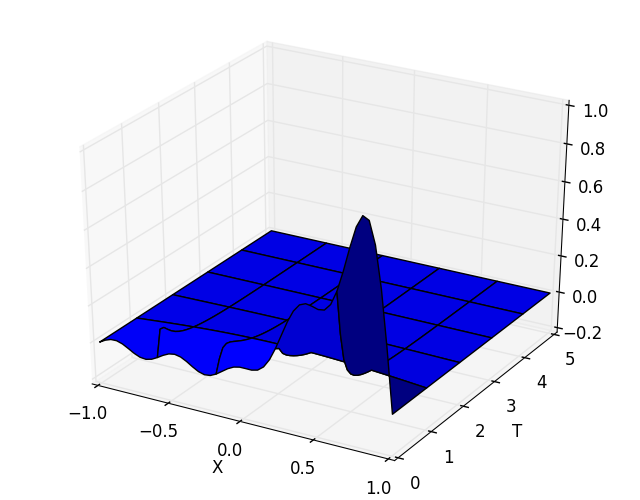

In [52]:
g=figure()
@manipulate for l in slider(1:20, value=5); withfig(g) do
        h(xt)=sum([A[k]*cos.((2*k-1)*pi*xt[1]/2).*
                exp.(-(((2*k-1)*pi/2)^2/4+1)*xt[2])+
                B[k]*sin.((k-1)*pi*xt[1]).*exp.(-(((k-1)*pi)^2+1)*xt[2]) 
                for k=1:l]) 
        surf(X,T,map(h,XT)')
        xlabel("X")
        ylabel("T")
    end
end

## Homogenizacija

U oba prethodna primjera zadani su homogeni rubni uvjeti. Ukoliko rubni uvjeti nisu homogeni, zadani problem je potrebno _homogenizirati_ kako bi mogli dobiti regularni SLP.

Navedimo primjer. Neka je zadan problem

\begin{align*}
& u_t -u_{xx}=0,\quad 0<x<l,\quad t>0 \\
& u(x,0)=f(x),\quad 0<x<l \\
& u(0,t)=g(t),\quad u(l,t)=h(t),\quad t>0.
\end{align*}
 
Nađimo rješenje u obliku

$$
u(x,t)=v(x,t)+U(x,t),
$$

gdje je $v$ rješenje problema sa homogenim rubnim uvjetima. Vrijedi

\begin{align*}
& u=v+U\\
& u_t=v_t+U_t\\
& u_{xx}=v_{xx}+U_{xx}
\end{align*}

pa zadana PDJ prelazi u 

$$
v_t+U_t=v_{xx}+U_{xx}.
$$

Početni uvjet za $v$ glasi

$$
v(x,0)=u(x,0)-U(x,0)=f(x)-U(x,0),
$$

a rubni uvjeti glase

\begin{align*}
& v(0,t)=u(0,t)-U(0,t)=g(t)-U(0,t)=0\quad  \textrm{(želimo homogeni uvjet)}\\
& v(l,t)=u(l,t)-U(l,t)=h(t)-U(l,t)=0 \quad  \textrm{(želimo homogeni uvjet)}
\end{align*}

Zaključujemo da će $v$ zadovoljavati homogene rubne uvjete ako je 

$$
U(x,t)=g(t)+\displaystyle\frac{x}{l}[h(t)-g(t)],\quad 0<x<l.
$$

Za ovako definiranu funkciju $U$ vrijedi

\begin{align*}
& U_t=g'(t)+\displaystyle\frac{x}{l}[h'(t)-g'(t)]\\
& U_{xx}=0.
\end{align*}

Uvrštavanjem slijedi da je $v$ rješenje _homogenog_ reakcijsko-difuzijskog problema

\begin{align*}
&v_t=v_{xx}-g'(t)-\displaystyle\frac{x}{l}[h'(t)-g'(t)], \quad 0<x<l,\quad t>0
\\
&v(x,0)=f(x)-g(0)-\displaystyle\frac{x}{l}[h(0)-g(0)], \quad 0<x<l
\\
& v(0,t)=0,\quad v(l,t)=0,\quad t>0,
\end{align*}

dok je rješenje polaznog problema

$$
u(x,t)=v(x,t)+g(t)+\displaystyle\frac{x}{l}[h(t)-g(t)].
$$